In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from joblib import load
from joblib import dump
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

instagram_df_test = pd.read_csv('./test.csv')
instagram_df_train = pd.read_csv('./train.csv')

In [3]:
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [4]:
df = instagram_df_train
from bios import bios

print(bios)

from textblob import TextBlob
def khalid(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

ans = [khalid(x) for x in bios[:576]]


print(ans)

for i, (polarity, subjectivity) in enumerate(ans):
    rounded_polarity = round(polarity,2)
    subjectivity_rounded = round(subjectivity,2)

    df.loc[i, 'polarity'] = rounded_polarity
    df.loc[i, 'subjectivity'] = subjectivity_rounded


# df.drop(axis=1, columns=['bios'], inplace=True)
# df['polarity'][0:10]
# df['subjectivity'][0:10]

['This is a sample bio with a positive sentiment.', 'Another bio with neutral sentiment.', 'I love programming and solving complex problems.', 'Life is full of ups and downs, but I always stay positive.', 'Exploring new places and meeting new people is my passion.', 'I believe in the power of hard work and dedication.', 'Living life to the fullest and enjoying every moment.', 'Always striving for excellence in everything I do.', 'I am a creative thinker and problem solver.', 'Passionate about technology and innovation.', 'I love spending time with my family and friends.', 'I am a fitness enthusiast and love staying active.', 'I enjoy reading books and learning new things.', 'I am a nature lover and enjoy outdoor activities.', 'I believe in the importance of education and continuous learning.', 'I am a foodie and love trying new cuisines.', 'I am a travel enthusiast and love exploring new destinations.', 'I am a music lover and enjoy listening to various genres.', 'I am a sports enthusi

In [19]:
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [20]:
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [21]:
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [22]:
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [23]:
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [24]:
instagram_df_train['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

In [25]:
instagram_df_train['external URL'].value_counts()

0    509
1     67
Name: external URL, dtype: int64

In [26]:
(instagram_df_train['description length'] > 50).sum()

98

<Figure size 1440x720 with 0 Axes>

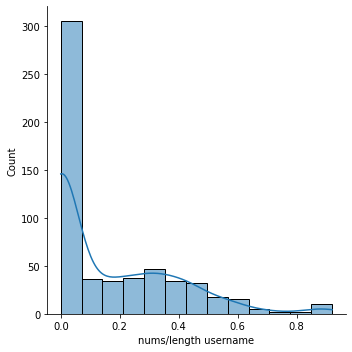

In [27]:
plt.figure(figsize = (20, 10))
sns.displot(instagram_df_train['nums/length username'],kde=True)

<AxesSubplot:>

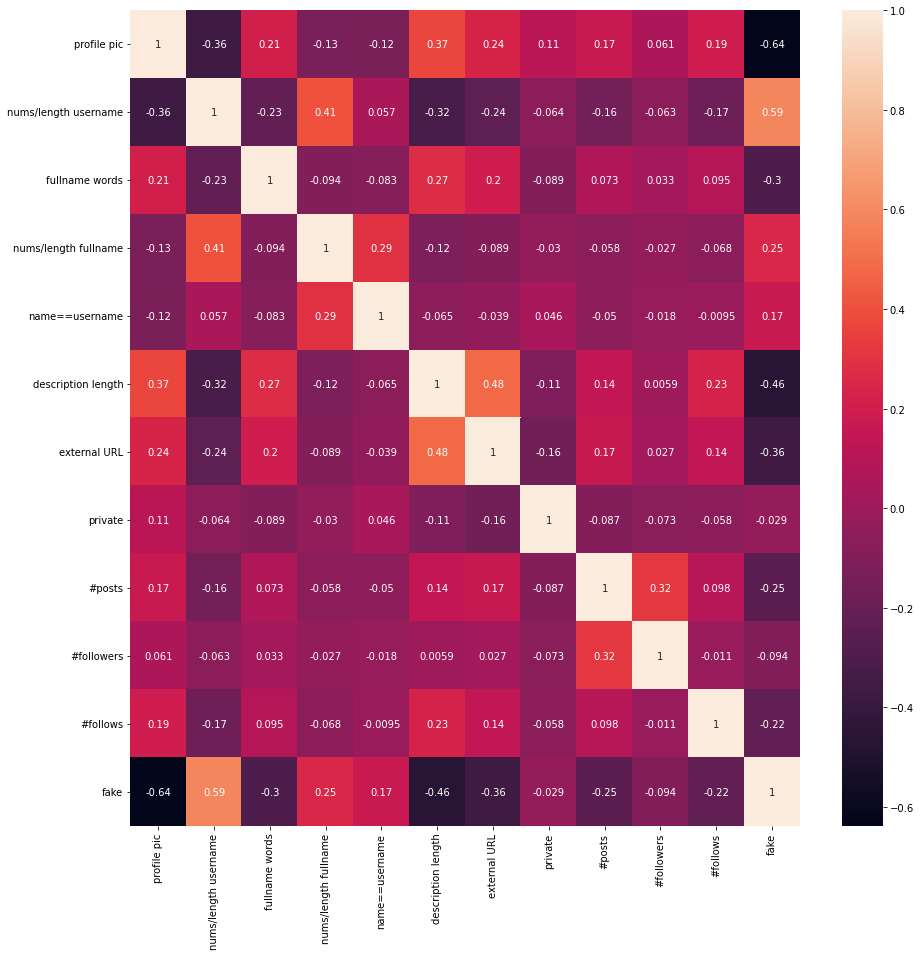

In [28]:
plt.figure(figsize=(15,15))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

In [29]:
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [30]:
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [32]:
target = "fake"

In [33]:
features = [
    "profile_pic", "username_length", "fullname_words", "fullname_length",
    "name_equals_username", "bio_length", "external_url", "is_private",
    "num_posts", "num_followers", "num_follows"
]

In [35]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rf_y_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9083333333333333


In [36]:
print("Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    oob_score=True
)
rf_model.fit(X_train, y_train)

dump(rf_model, 'random_forest_model.joblib')
print("Random Forest model saved as random_forest_model.joblib.")

Training Random Forest...
Random Forest model saved as random_forest_model.joblib.


In [37]:
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Random Forest Performance:
Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.93      0.90      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

Confusion Matrix:
 [[56  4]
 [ 6 54]]


In [39]:
import xgboost as xgb
print("\nTraining XGBoost...")
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

dump(xgb_model, 'xgboost_model.joblib')
print("XGBoost model saved as xgboost_model.joblib.")

xgb_predictions = xgb_model.predict(X_test)
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))


Training XGBoost...
XGBoost model saved as xgboost_model.joblib.

XGBoost Performance:
Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92        60
           1       0.92      0.93      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120

Confusion Matrix:
 [[55  5]
 [ 4 56]]


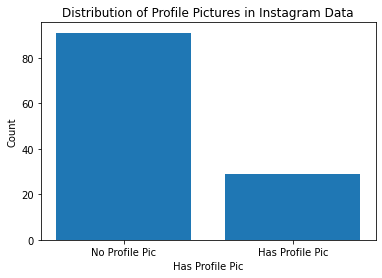

In [14]:
import matplotlib.pyplot as plt

profile_pic_counts = instagram_df_test['profile pic'].value_counts() 
labels = ['No Profile Pic', 'Has Profile Pic']  
counts = profile_pic_counts.tolist()

plt.bar(labels, counts)
plt.xlabel('Has Profile Pic')
plt.ylabel('Count')
plt.title('Distribution of Profile Pictures in Instagram Data')
plt.xticks(rotation=0)  
plt.show()